In [1]:
#Luís Filipe Silva Forti - 14592348
#Miguel Rodrigues Fonseca - 14682196

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
#Abre o arquivo
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')

#Remove linhas com dados inúteis
df = df[df.User_Score != "tbd"] #valores indefinidos
df = df[df.Critic_Score != "tbd"] #valores indefinidos
df = df.dropna() #Valores inválidos

#Separa as colunas desejadas
df = df.filter(['Name', 'Critic_Score', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

# Dados Globais

In [4]:
#Confiança da amostra
confianca = 0.9

#Nomes e cores para os plots
nomes = ['NA', 'EU', 'JP', 'Resto']
cores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

#Ordena por pontuação dos críticos
pontCriticos = df.sort_values("Critic_Score", ascending=True)
pontCriticos = pontCriticos.reset_index()

#Tabela com os valores de vendas de todas as regiões
valores = np.column_stack((pontCriticos.NA_Sales, pontCriticos.EU_Sales, pontCriticos.JP_Sales, pontCriticos.Other_Sales))
#Pega o número de linhas e colunas dos dados
n, m = valores.shape

#Pega as possíveis notas dos críticos
X = pontCriticos.Critic_Score.unique().tolist()
#Para fazer a regressão polinomial, o vetor de posições precisa ser feito de vetores
X2 = [[i] for i in pontCriticos.Critic_Score.values]

# Intervalo de confiança

In [5]:
#Para salvar as médias e limites de vendas cada região
medias = np.zeros(m)
limites = np.zeros(shape=(m, 2))

#Para cada região
for i in range(0, m):
    #Pega as vendas
    amostra = valores[:, i]
    
    #Média
    medias[i] = np.mean(amostra)
    #Limites
    limites[i, 0] = medias[i] - stats.norm.ppf(1/2 + confianca/2) * np.std(amostra, ddof=1) / (amostra.size**(1/2))
    limites[i, 1] = medias[i] + stats.norm.ppf(1/2 + confianca/2) * np.std(amostra, ddof=1) / (amostra.size**(1/2))

#Imprime os dados coletados
dados = np.column_stack((nomes, medias, limites, [confianca] * m))
print(tabulate(dados, headers=['Região', 'Média', 'Limites inferiores', 'Limites superiores', 'Confiança'], tablefmt="grid"))

+----------+-----------+----------------------+----------------------+-------------+
| Região   |     Média |   Limites inferiores |   Limites superiores |   Confiança |
+==========+===========+======================+======================+=============+
| NA       | 0.394484  |            0.375223  |            0.413744  |         0.9 |
+----------+-----------+----------------------+----------------------+-------------+
| EU       | 0.236089  |            0.222404  |            0.249774  |         0.9 |
+----------+-----------+----------------------+----------------------+-------------+
| JP       | 0.0641582 |            0.0584327 |            0.0698838 |         0.9 |
+----------+-----------+----------------------+----------------------+-------------+
| Resto    | 0.0826769 |            0.0773037 |            0.0880501 |         0.9 |
+----------+-----------+----------------------+----------------------+-------------+


# Regressão polinomial

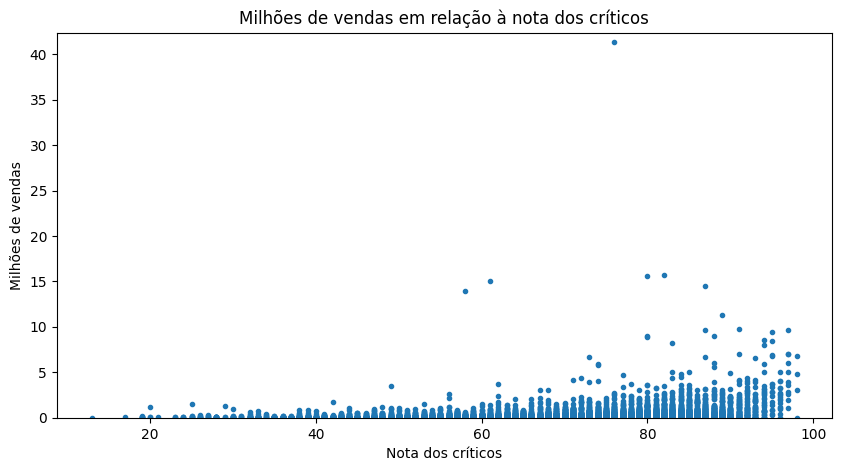

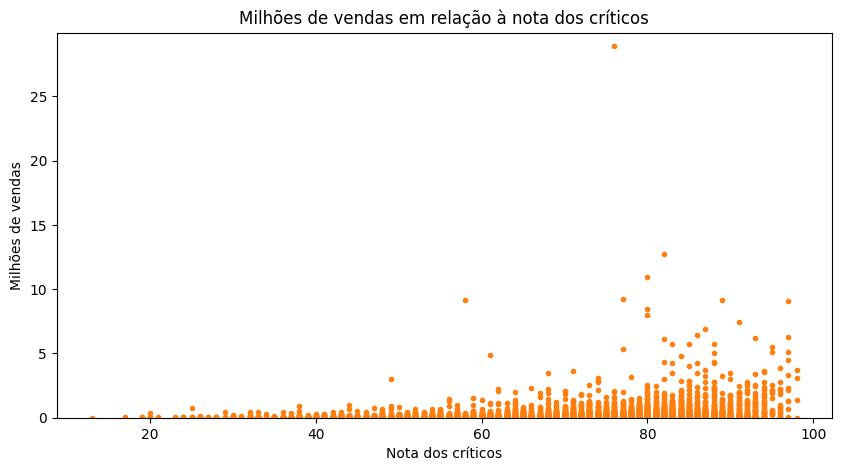

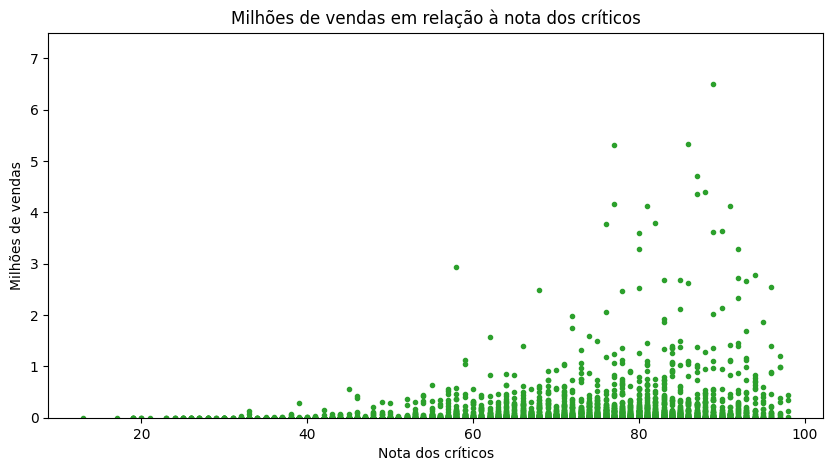

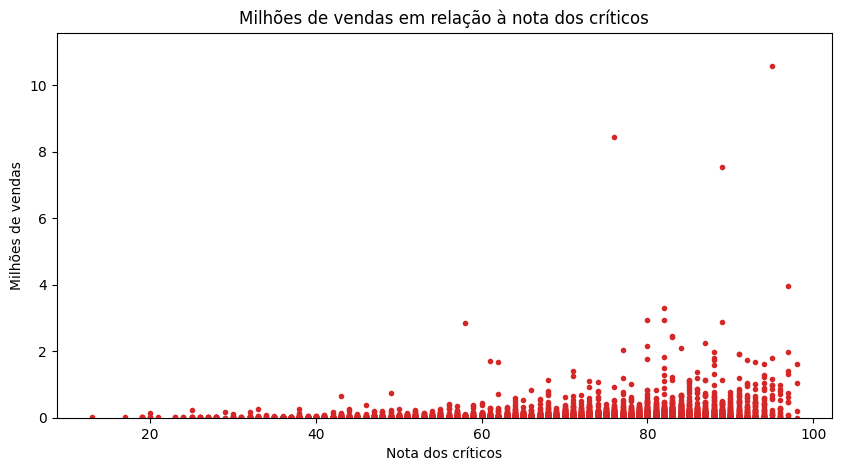

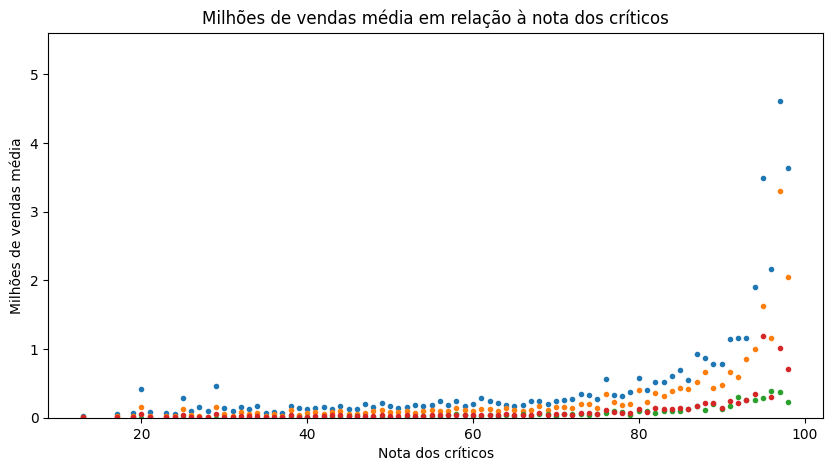

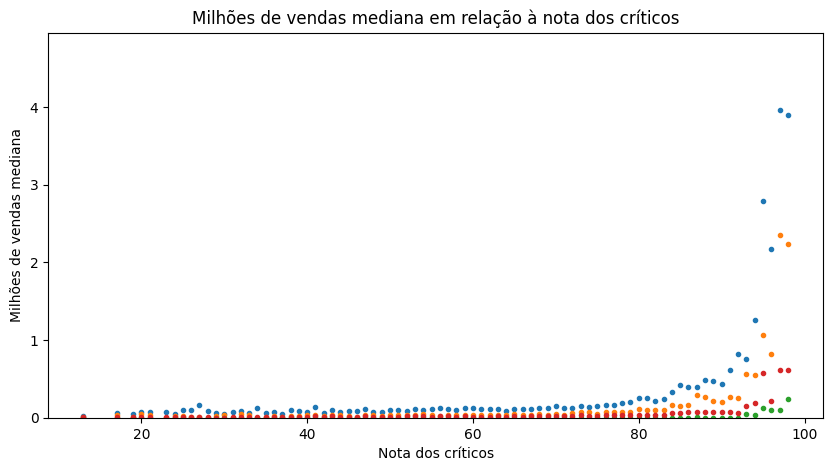

In [6]:
#Para calcular as médias e medianas de cada avaliação
medias = np.zeros(shape=(len(X), m))
medianas = np.zeros(shape=(len(X), m))

#Para cada pontuação
for i in range(0, len(X)):
    #Pega as vendas relacionadas à nota para todas as regiões
    val = valores[pontCriticos.Critic_Score == X[i]]
    
    #Calcula as médias e medianas por região
    medias[i, :] = np.mean(val, axis=0)
    medianas[i, :] = np.median(val, axis=0)

#Plota os dados coletados para cada região
for i in range(0, m):
    plt.figure(figsize=(10, 5))
    plt.scatter(pontCriticos.Critic_Score, valores[:, i], marker='.', c=cores[i])
    plt.title('Milhões de vendas em relação à nota dos críticos')
    plt.xlabel('Nota dos críticos')
    plt.ylabel('Milhões de vendas')
    plt.ylim(0.0, np.max(valores[:, i]) + 1)
    plt.show()

#Plota as médias para cada região no mesmo gráfico
plt.figure(figsize=(10, 5))

for i in range(0, m):
    plt.scatter(X, medias[:, i], marker='.', c=cores[i])
    
plt.title('Milhões de vendas média em relação à nota dos críticos')
plt.xlabel('Nota dos críticos')
plt.ylabel('Milhões de vendas média')
plt.ylim(0.0, np.max(medias) + 1)
plt.show()

#Plota as medianas para cada região no memso gráfico
plt.figure(figsize=(10, 5))
for i in range(0, m):
    plt.scatter(X, medianas[:, i], marker='.', c=cores[i])
plt.title('Milhões de vendas mediana em relação à nota dos críticos')
plt.xlabel('Nota dos críticos')
plt.ylabel('Milhões de vendas mediana')
plt.ylim(0.0, np.max(medianas) + 1)
plt.show()

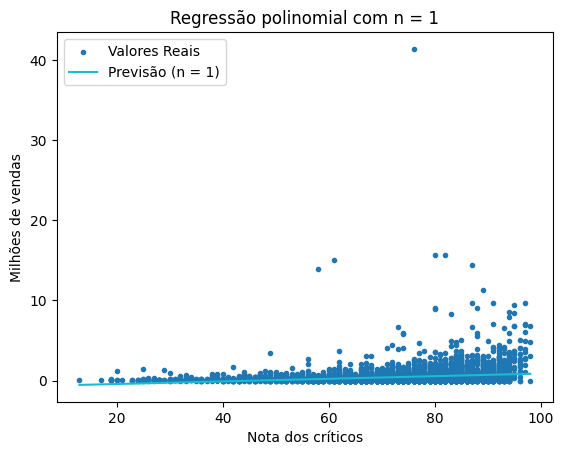

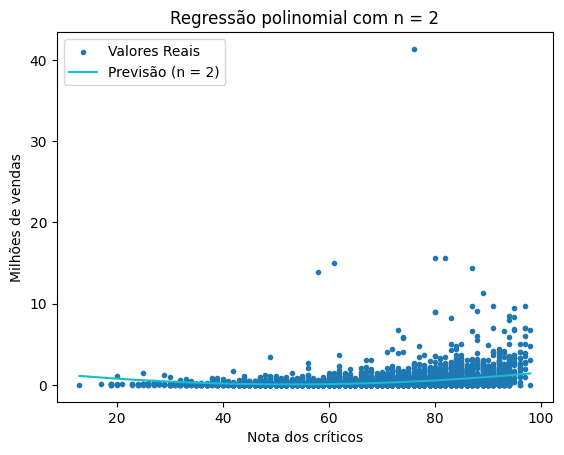

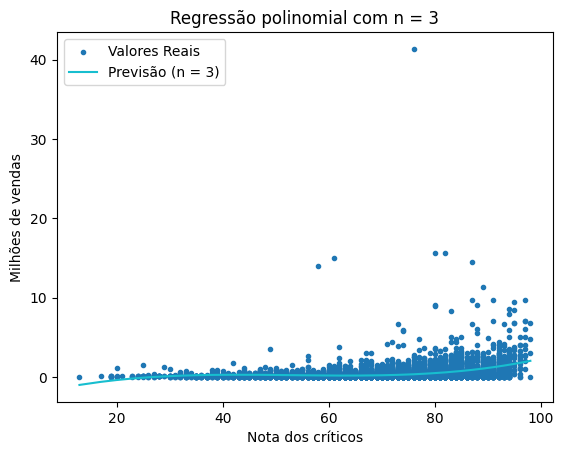

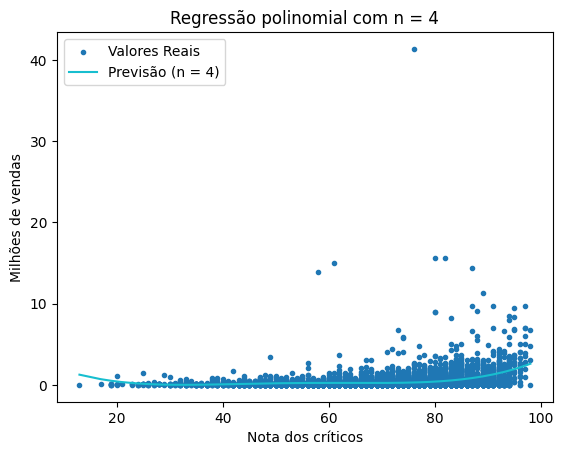

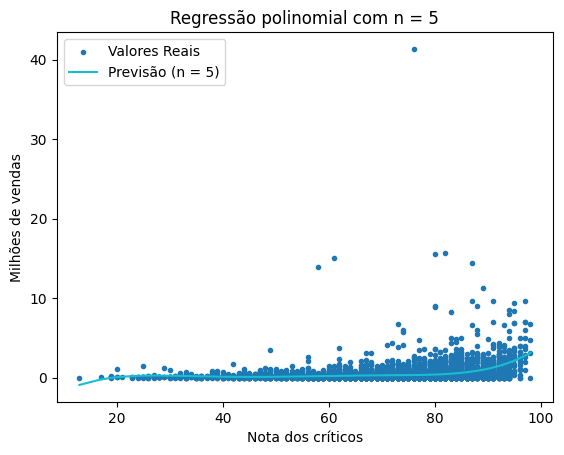

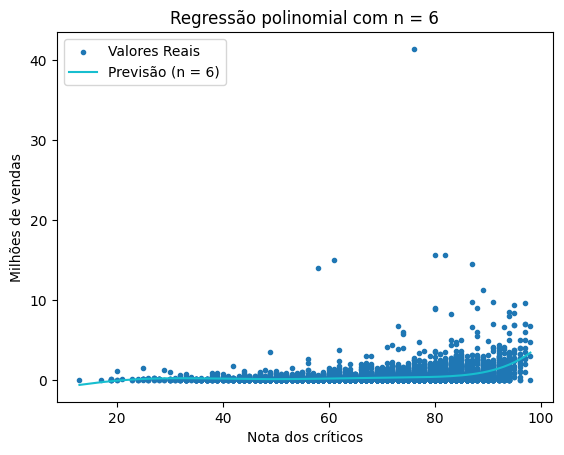

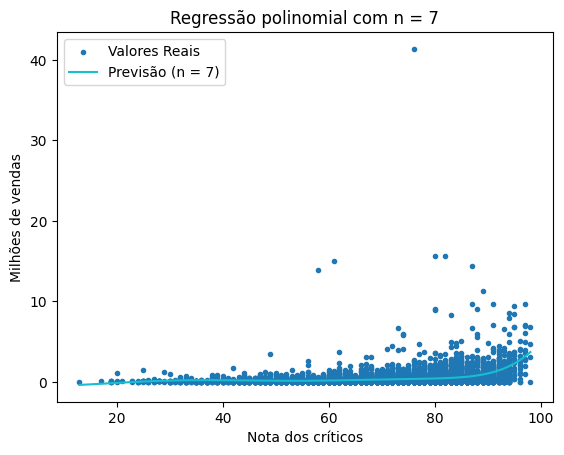

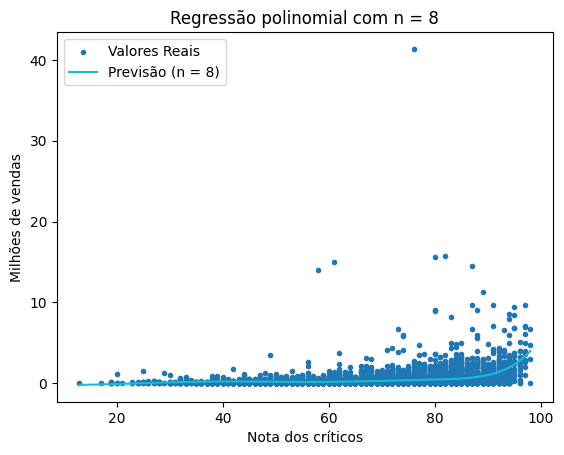

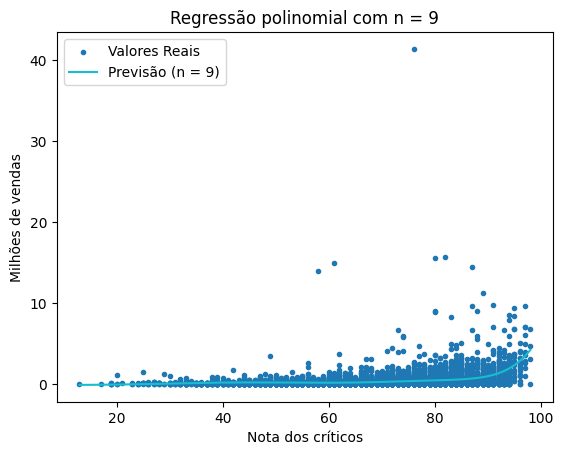

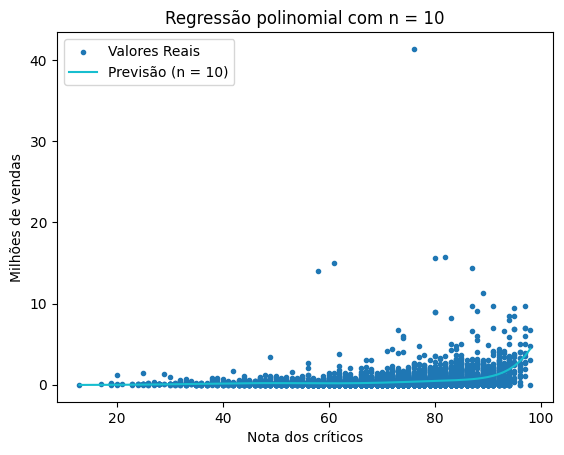

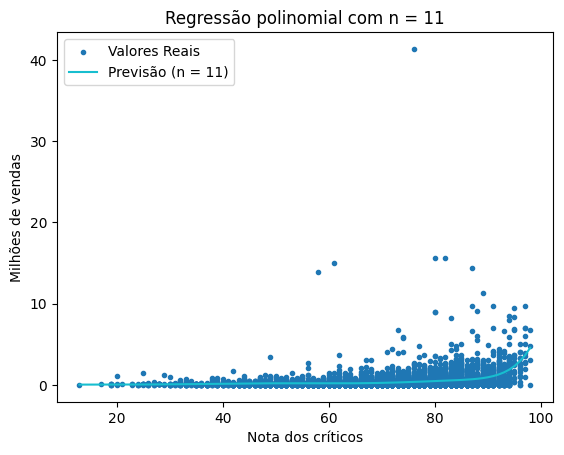

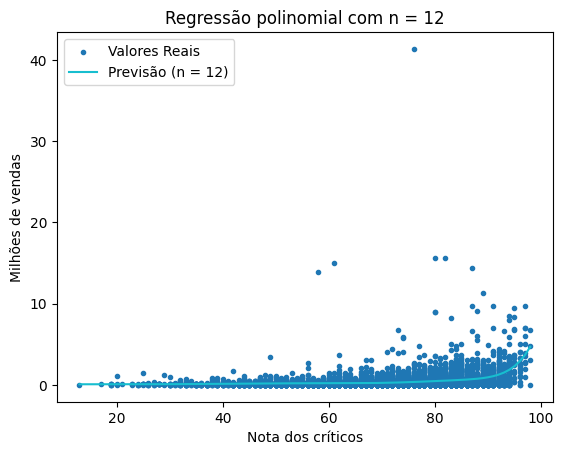

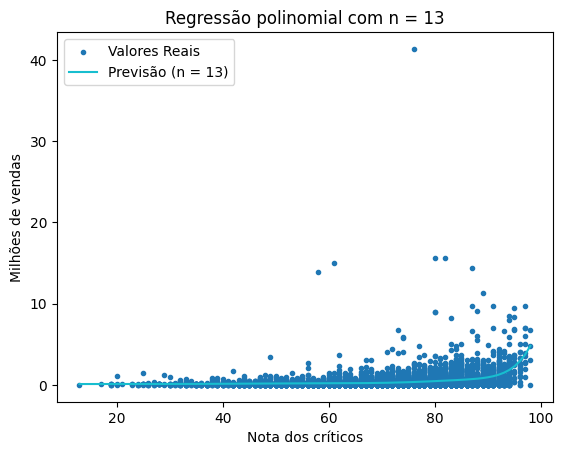

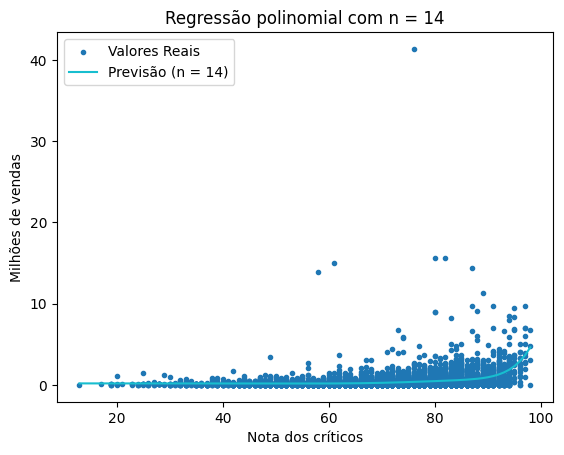

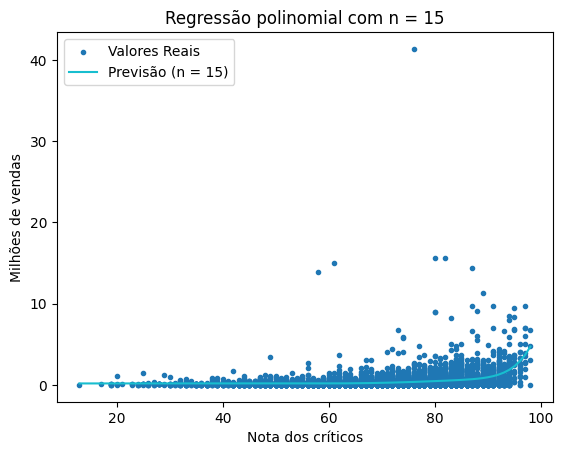

+---------------------+-------------------------+-------------------------------------------+
|   Grau do polinômio |   Erro quadrático médio |   Variação do erro em relação ao anterior |
+=====================+=========================+===========================================+
|                   1 |                0.884646 |                               0           |
+---------------------+-------------------------+-------------------------------------------+
|                   2 |                0.85501  |                              -0.0296362   |
+---------------------+-------------------------+-------------------------------------------+
|                   3 |                0.838918 |                              -0.0160921   |
+---------------------+-------------------------+-------------------------------------------+
|                   4 |                0.830229 |                              -0.00868868  |
+---------------------+-------------------------+-----------

In [7]:
#Intervalo de Ns que devem serem calculados
ns = [val for val in range(1, 16)]

#Para salvar as precisões de cada polinômio
precisoes = np.zeros(len(ns))

#Para cada valor de n
for i in ns:
    #Configura a função pra usar o grau n
    pr = PolynomialFeatures(degree = i)
    #Configura para os valores de X passados
    X_poly = pr.fit_transform(X2)
    #Prepara a função
    lr_2 = LinearRegression()
    #Passa os valores
    lr_2.fit(X_poly, pontCriticos.NA_Sales)

    #Plota os dados reais
    plt.scatter(pontCriticos.Critic_Score, pontCriticos.NA_Sales, marker='.')
    #Plota a predição do polinômio
    plt.plot(X2, lr_2.predict(X_poly), color = 'tab:cyan')
    plt.title('Regressão polinomial com n = ' + str(i))
    plt.xlabel('Nota dos críticos')
    plt.ylabel('Milhões de vendas')
    plt.legend(['Valores Reais', 'Previsão (n = ' + str(i) + ')'], loc='best', facecolor='white')
    plt.show()
    #Calcula a precisão do polinômio
    precisoes[ns.index(i)] = sklearn.metrics.mean_squared_error(pontCriticos.NA_Sales, lr_2.predict(X_poly))

#Para calcular o aumento de precisão por iteração
diferencas = np.zeros(precisoes.size)
#Para cada precisão
for i in range(1, precisoes.size):
    #Calcula a diferença em relação ao anterior
    diferencas[i] = precisoes[i] - precisoes[i-1]

#Cria uma matriz com os dados
precisoesRegressao = np.column_stack((np.array(ns), precisoes, diferencas))
#Imprime a tabela sobre as precisões
print(tabulate(precisoesRegressao, headers=['Grau do polinômio', 'Erro quadrático médio', 'Variação do erro em relação ao anterior'], tablefmt="grid"))

In [8]:
#Intervalo de Ns que devem serem calculados
ns = [val for val in range(1, 151)]

#N e erro do menor erro para cada região
nErr = [[-1, 100]] * m

#Para cada valor de n
for i in ns:
    for j in range(0, m):
        #Configura a função pra usar o grau n
        pr = PolynomialFeatures(degree = i)
        #Configura para os valores de X passados
        X_poly = pr.fit_transform(X2)
        #Prepara a função
        lr_2 = LinearRegression()
        #Passa os valores
        lr_2.fit(X_poly, valores[:, j])

        err = sklearn.metrics.mean_squared_error(pontCriticos.NA_Sales, lr_2.predict(X_poly))
        if err < nErr[j][1]:
            nErr[j][1] = err
            nErr[j][0] = i

#Cria uma matriz com os dados
melhoresPrecisoes = np.column_stack((nomes, nErr))
#Imprime a tabela sobre as precisões
print(tabulate(melhoresPrecisoes, headers=['Região', 'Menor erro quadrático médio', 'Grau do polinômio relacionado'], tablefmt="grid"))

+----------+-------------------------------+---------------------------------+
| Região   |   Menor erro quadrático médio |   Grau do polinômio relacionado |
+==========+===============================+=================================+
| NA       |                            30 |                        0.817517 |
+----------+-------------------------------+---------------------------------+
| EU       |                            30 |                        0.817517 |
+----------+-------------------------------+---------------------------------+
| JP       |                            30 |                        0.817517 |
+----------+-------------------------------+---------------------------------+
| Resto    |                            30 |                        0.817517 |
+----------+-------------------------------+---------------------------------+


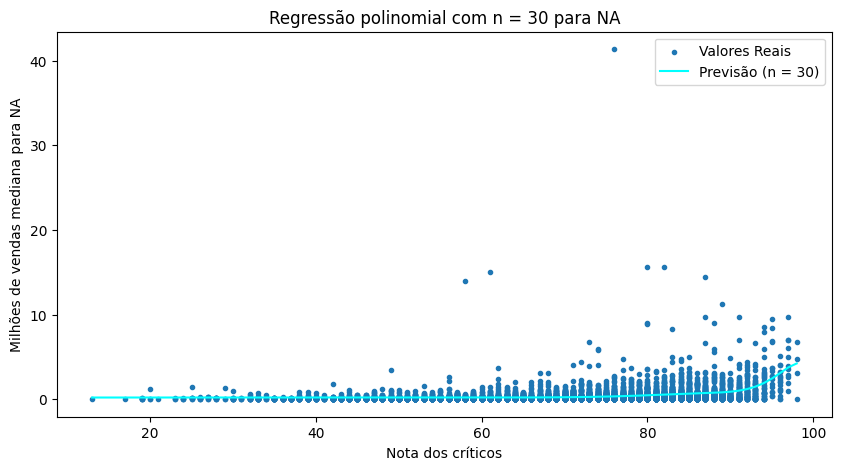

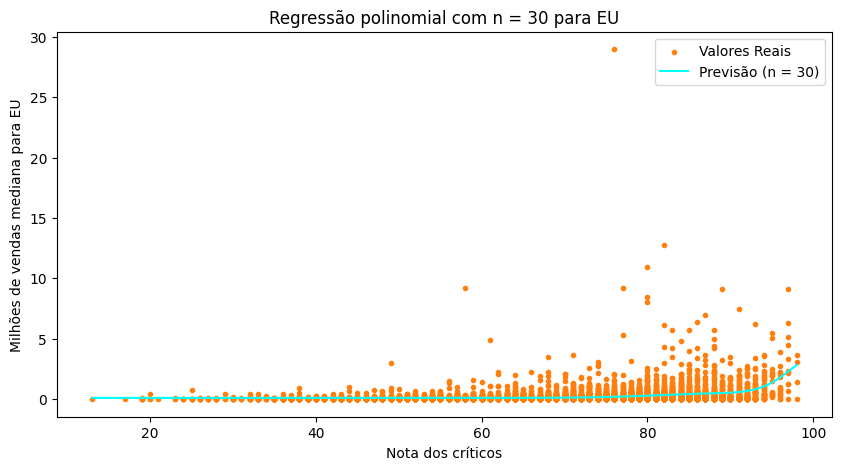

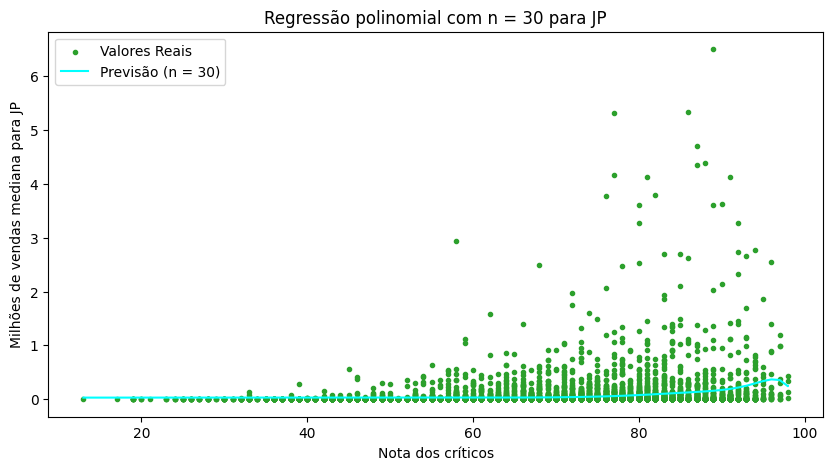

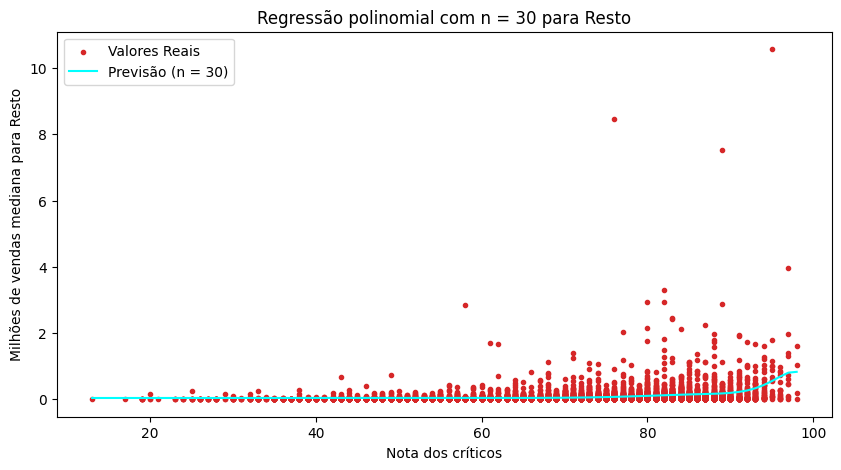

In [9]:
#Valor de n mais preciso dos testes
ns = 30

#Para cada região
for i in range(0, len(nomes)):
    #Configura o polinômio para a região com grau definido anteriormente
    pr = PolynomialFeatures(degree = ns)
    X_poly = pr.fit_transform(X2)
    lr_2 = LinearRegression()
    lr_2.fit(X_poly, valores[:, i])

    #Imprime o gráfico com os valores reais e previstos para a região
    plt.figure(figsize=(10, 5))
    plt.scatter(pontCriticos.Critic_Score, valores[:, i], marker='.', c=cores[i])
    plt.plot(X2, lr_2.predict(X_poly), color = 'cyan')
    plt.title('Regressão polinomial com n = ' + str(ns) + " para " + nomes[i])
    plt.xlabel('Nota dos críticos')
    plt.ylabel('Milhões de vendas mediana para ' + nomes[i])
    plt.legend(['Valores Reais', 'Previsão (n = ' + str(ns) + ')'], loc='best', facecolor='white')
    plt.show()

# Anova

In [10]:
#Pega a média da matriz
mediaDaMatriz = np.mean(valores)

#Grau de liberdade entre as médias
#Se soubermos m-1 médias e a média da matriz, poderíamos deduzir a última média
grauDeLiberdadeEntre = m-1
#Grau de liberdade entre as colunas
#Se soubermos as médias de cada coluna, precisaríamos apenas de n-1 dados de cada coluna para deduzir o restante
grauDeLiberdadeDentro = m*(n-1)

#Soma dos quadrados entre as colunas
somaDosQuadradosEntre = 0
#Soma dos quadrados dentro de cada coluna
somaDosQuadradosDentro = 0

#Para cada coluna
for i in range(0, m):
    #Calcula a média da coluna
    mediaGrupo = np.mean(valores[:, i])

    #Calcula as somas dos quadrados
    somaDosQuadradosEntre += n * np.sum(np.power(mediaGrupo - mediaDaMatriz, 2))
    somaDosQuadradosDentro += np.sum(np.power(valores[:, i] - mediaGrupo, 2))

#Calcula a estatística-F resultante
estatisticaF = (somaDosQuadradosEntre/grauDeLiberdadeEntre)/(somaDosQuadradosDentro/grauDeLiberdadeDentro)

#Imprime os dados coletados
print(tabulate([[m*n - 1, grauDeLiberdadeEntre, grauDeLiberdadeDentro, estatisticaF, stats.f.ppf(confianca, grauDeLiberdadeEntre, grauDeLiberdadeDentro)]]
               , headers=['Grau de liberdade total', 'Grau de liberdade entre (numerador)', 'Grau de liberdade dentro (denominador)', 'Estatística-F', 'Valor crítico F'], tablefmt="grid"))

+---------------------------+---------------------------------------+------------------------------------------+-----------------+-------------------+
|   Grau de liberdade total |   Grau de liberdade entre (numerador) |   Grau de liberdade dentro (denominador) |   Estatística-F |   Valor crítico F |
+===========================+=======================================+==========================================+=================+===================+
|                     27299 |                                     3 |                                    27296 |         414.424 |             2.084 |
+---------------------------+---------------------------------------+------------------------------------------+-----------------+-------------------+


In [11]:
res = np.zeros(m)
p = np.zeros(m)

for i in range(0, m):
    aux = pd.crosstab(valores[:, i], pontCriticos.Critic_Score)
    res[i], p[i], dof, expected = stats.chi2_contingency(aux)

#Cria uma matriz com os dados
melhoresPrecisoes = np.column_stack((nomes, res, p))
#Imprime a tabela sobre as precisões
print(tabulate(melhoresPrecisoes, headers=['Região', 'Resultado do qui-quadrado', 'Valor-p'], tablefmt="grid"))

+----------+-----------------------------+-------------+
| Região   |   Resultado do qui-quadrado |     Valor-p |
+==========+=============================+=============+
| NA       |                     38959.8 | 0           |
+----------+-----------------------------+-------------+
| EU       |                     30932.5 | 0           |
+----------+-----------------------------+-------------+
| JP       |                     13183   | 6.12292e-06 |
+----------+-----------------------------+-------------+
| Resto    |                     18073.2 | 4.2036e-307 |
+----------+-----------------------------+-------------+
